## Exercise 6.12: Computing and Plotting ROC Curve for a Binary Classification Problem
The goal of this exercise is to plot the ROC curve for a binary classification problem. The data for this problem is used to predict whether or not a mother will require a caesarian section to give birth.

"This dataset contains information about caesarian section results of 80 pregnant women with the most important characteristics of delivery problems in the medical field." The attributes of interest are age, delivery number, delivery time, blood pressure, and heart status.

In [1]:
#2 import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [5]:
#3 create headers and read in data
_headers = ['Age', 'Delivery_Nbr', 'Delivery_Time', 'Blood_Pressure', 'Heart_Problem', 'Caesarian']
df = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter06/Dataset/caesarian.csv.arff', 
                 names=_headers, index_col=None, skiprows=15)
df.head()

,Age,Delivery_Nbr,Delivery_Time,Blood_Pressure,Heart_Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


In [6]:
#4 target column is 'Caesarian'
features = df.drop(['Caesarian'], axis=1).values
labels = df[['Caesarian']].values

# split 80% for training 20% into an evaluation set
X_train, X_eval, y_train, y_eval = train_test_split(features, labels, test_size=0.2, random_state=0)

# further split the evaluation set into validation and test sets of 10% each
X_val, X_test, y_val, y_test = train_test_split(X_eval, y_eval, test_size=0.5, random_state=0)

In [7]:
#5 train and fit logistic regression model:
model = LogisticRegression()
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [8]:
#6 predict probabilities
y_prob = model.predict_proba(X_val)

In this step, the model predicts the probabilities for each entry in the validation dataset.

In [10]:
#7 compute rates for tp, fp and the thresholds:
_false_positive, _true_positive, _thresholds = roc_curve(y_val, y_prob[:, 0])

In this step, you make a call to roc_curve() and specify the ground truth and the first column of the predicted probabilities. The result is a tuple of false positive rate, true positive rate, and thresholds.

In [11]:
#8 explore false positive rates:
print(_false_positive)

[0.  0.  0.  0.5 0.5 1.  1. ]


In [12]:
#9 explore true positive rates:
print(_true_positive)

[0.         0.16666667 0.33333333 0.33333333 0.83333333 0.83333333
 1.        ]


In [13]:
#10 explore thresholds:
print(_thresholds)

[1.55519917 0.55519917 0.55005086 0.48008433 0.32085037 0.22083119
 0.19657847]


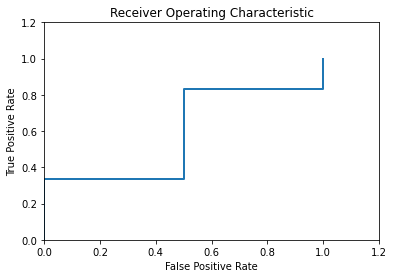

In [14]:
#11 plot the RoC
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(_false_positive, _true_positive, lw=2, label='Receiver Operating Characteristic')
plt.xlim(0.0, 1.2)
plt.ylim(0.0, 1.2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

The higher the threshold, the more confident the model needs to be before you classify a prediction as positive. Recall that the logit is the probability that the input belongs to a class and is a confidence score from 0 to 1.

## Area Under the ROC Curve

The Area Under the Receiver Operating Characteristic Curve (ROC AUC) is a measure of the likelihood that the model will rank a randomly chosen positive example higher than a randomly chosen negative example. Another way of putting it is to say that the higher this measure is, the better the model is at predicting a negative class as negative, and a positive class as positive.

## Exercise 6.13: Computing the ROC AUC for the Caesarian Dataset

The goal of this exercise is to compute the ROC AUC for the binary classification model that you trained in Exercise 6.12, Computing and Plotting ROC Curve for a Binary Classification Problem.

In [15]:
#2 predict the probabilities:
y_prob = model.predict_proba(X_val)

In [16]:
#3 compute ROC AUC:
from sklearn.metrics import roc_auc_score
_auc = roc_auc_score(y_val, y_prob[:, 0])
print(_auc)

0.5833333333333334


## Saving and Loading Models

You will eventually need to transfer some of the models you have trained to a different computer so they can be put into production. There are various utilities for doing this, but the one we will discuss is called joblib.

joblib supports saving and loading models, and it saves the models in a format that is supported by other machine learning architectures, such as ONNX.

joblib is found in the sklearn.externals module.